In [4]:
# Команди для завантаження та розпакування нової моделі (98 МБ)
# Якщо ви працюєте локально, виконайте ці команди у вашому терміналі
!wget https://lang.org.ua/static/downloads/models/fiction.cased.tokenized.word2vec.300d.bz2


--2025-06-25 14:10:36--  https://lang.org.ua/static/downloads/models/fiction.cased.tokenized.word2vec.300d.bz2
Resolving lang.org.ua (lang.org.ua)... 65.21.91.242
Connecting to lang.org.ua (lang.org.ua)|65.21.91.242|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 102666113 (98M) [application/octet-stream]
Saving to: ‘fiction.cased.tokenized.word2vec.300d.bz2’

fiction.cased.token 100%[===================>]  97.91M  26.0MB/s    in 3.8s    

2025-06-25 14:10:41 (26.0 MB/s) - ‘fiction.cased.tokenized.word2vec.300d.bz2’ saved [102666113/102666113]



In [5]:
!bzip2 -dk /content/fiction.cased.tokenized.word2vec.300d.bz2

In [14]:
!pip install pymorphy2-dicts-uk

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 75.5 MB/s eta 0:00:00


In [16]:
!pip install --upgrade pymorphy2 pymorphy2-dicts-uk

In [20]:
# --- БЛОК ПОВНОГО НАЛАШТУВАННЯ (з використанням pymorphy3) ---

# 1. Встановлюємо сучасну бібліотеку та її словники
print("Крок 1: Встановлення pymorphy3 та словників...")
!pip install pymorphy3 pymorphy3-dicts-uk

# 2. Імпортуємо все необхідне
import pandas as pd
from gensim.models import KeyedVectors
import pymorphy3  # <--- Змінено імпорт
import os

# 3. Ініціалізуємо лематизатор
print("\nКрок 2: Ініціалізація лематизатора...")
try:
    # <--- Використовуємо pymorphy3
    morph = pymorphy3.MorphAnalyzer(lang='uk')
    print("MorphAnalyzer (pymorphy3) успішно створено.")
except Exception as e:
    print(f"Помилка при ініціалізації MorphAnalyzer: {e}")
    morph = None

# 4. Завантажуємо датасет
print("\nКрок 3: Завантаження датасету столиць...")
url_capitals = "https://raw.githubusercontent.com/lang-uk/vecs/refs/heads/master/test/test_vocabulary.txt"
data = pd.read_csv(url_capitals, delimiter='\t', header=None, skiprows=1, names=['country1', 'city1', 'country2', 'city2'])
print("Датасет столиць завантажено.")

# 5. Завантажуємо модель Word2Vec
print("\nКрок 4: Завантаження моделі Word2Vec...")
model_path = "/content/ubercorpus.lowercased.lemmatized.word2vec.300d"

if os.path.exists(model_path):
    try:
        model = KeyedVectors.load_word2vec_format(
            model_path,
            binary=False,
            limit=200000
        )
        print("Модель 'lowercased.lemmatized' успішно завантажена!")
    except Exception as e:
        print(f"Виникла помилка під час завантаження моделі: {e}")
        model = None
else:
    print(f"ПОМИЛКА: Файл моделі не знайдено за шляхом '{model_path}'.")
    model = None

# Фінальна перевірка
if model is not None and morph is not None:
    print("\n-------------------------------------------")
    print("Успіх! Налаштування завершено. Можна продовжувати.")
    print("-------------------------------------------")
else:
    print("\n-------------------------------------------------------------")
    print("Помилка налаштування. Перевірте повідомлення вище.")
    print("-------------------------------------------------------------")

Крок 1: Встановлення pymorphy3 та словників...
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.1/54.1 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 106.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 110.5 MB/s eta 0:00:00

Крок 2: Ініціалізація лематизатора...
MorphAnalyzer (pymorphy3) успішно створено.

Крок 3: Завантаження датасету столиць...
Датасет столиць завантажено.

Крок 4: Завантаження моделі Word2Vec...
Модель 'lowercased.lemmatized' успішно завантажена!

-------------------------------------------
Успіх! Налаштування завершено. Можна продовжувати.
-------------------------------------------


In [17]:
import pandas as pd
from gensim.models import KeyedVectors
import pymorphy2

# 1. Ініціалізуємо морфологічний аналізатор (тепер це має спрацювати)
try:
    morph = pymorphy2.MorphAnalyzer(lang='uk')
    print("MorphAnalyzer успішно створено.")
except Exception as e:
    print(f"Сталася помилка при ініціалізації MorphAnalyzer: {e}")


# 2. Створюємо допоміжну функцію для обробки слів
def preprocess_word(word, analyzer):
    """Приводить слово до леми в нижньому регістрі."""
    p = analyzer.parse(word)[0]
    return p.normal_form.lower()

# 3. Завантажуємо дані про столиці (без змін)
url_capitals = "https://raw.githubusercontent.com/lang-uk/vecs/refs/heads/master/test/test_vocabulary.txt"
data = pd.read_csv(url_capitals, delimiter='\t', header=None, skiprows=1, names=['country1', 'city1', 'country2', 'city2'])
print("Датасет столиць завантажено.")

# 4. Завантажуємо лематизовану модель
try:
    model_path = "/content/ubercorpus.lowercased.lemmatized.word2vec.300d"
    model = KeyedVectors.load_word2vec_format(
        model_path,
        binary=False,
        limit=200000  # Обмеження, щоб уникнути проблем з пам'яттю
    )
    print("Модель 'lowercased.lemmatized' успішно завантажена!")
except FileNotFoundError:
    print(f"Помилка: Файл моделі не знайдено за шляхом {model_path}")
    model = None
except Exception as e:
    print(f"Виникла помилка при завантаженні моделі: {e}")
    model = None

Сталася помилка при ініціалізації MorphAnalyzer: module 'inspect' has no attribute 'getargspec'
Датасет столиць завантажено.
Модель 'lowercased.lemmatized' успішно завантажена!


In [23]:
# Перевіряємо, чи модель та лематизатор були успішно завантажені
if 'model' in locals() and model is not None and 'morph' in locals() and morph is not None:

    # --- Визначення функцій ---

    # Допоміжна функція для обробки слів
    def preprocess_word(word, analyzer):
        """Приводить слово до леми в нижньому регістрі."""
        p = analyzer.parse(str(word))[0]
        return p.normal_form.lower()

    # Функція для обчислення косинусної подібності
    def cosine_similarity(u, v):
        """Обчислює косинусну подібність між векторами u та v."""
        return np.dot(u, v) / (np.linalg.norm(u) * np.linalg.norm(v))

    # Функція для пошуку аналогій
    def get_country_lemmatized(city1, country1, city2, word_embeddings, analyzer):
        city1_processed = preprocess_word(city1, analyzer)
        country1_processed = preprocess_word(country1, analyzer)
        city2_processed = preprocess_word(city2, analyzer)
        group = {city1_processed, country1_processed, city2_processed}
        for word in group:
            if word not in word_embeddings:
                return None, 0.0
        emb_city1 = word_embeddings[city1_processed]
        emb_country1 = word_embeddings[country1_processed]
        emb_city2 = word_embeddings[city2_processed]
        vec = emb_city2 - emb_city1 + emb_country1
        similarity = -1
        country = ''
        for word in word_embeddings.index_to_key:
            if word not in group:
                word_emb = word_embeddings[word]
                cur_similarity = cosine_similarity(vec, word_emb)
                if cur_similarity > similarity:
                    similarity = cur_similarity
                    country = word
        return country, similarity

    # Функція для розрахунку точності (ВИПРАВЛЕНА ВЕРСІЯ)
    def get_accuracy_lemmatized(word_embeddings, data, analyzer):
        num_correct = 0
        test_data = data.head(100)

        print(f"\nПочинаємо розрахунок точності на {len(test_data)} прикладах...")

        for i, row in test_data.iterrows():
            # --- ВИПРАВЛЕННЯ ТУТ ---
            # Правильно отримуємо всі чотири значення з рядка
            country1 = row['country1']
            city1 = row['city1']
            country2 = row['country2'] # Це правильна відповідь
            city2 = row['city2']     # Це друге місто, яке ми передаємо у функцію

            # Тепер змінна 'city2' існує, і помилки не буде
            predicted_country_lemma, _ = get_country_lemmatized(city1, country1, city2, word_embeddings, analyzer)

            if predicted_country_lemma is not None:
                # Правильна відповідь - це 'country2'
                correct_country2_lemma = preprocess_word(country2, analyzer)

                if predicted_country_lemma == correct_country2_lemma:
                    num_correct += 1

        accuracy = num_correct / len(test_data)
        return accuracy

    # --- ЗАПУСК ОБЧИСЛЕНЬ ---

    print("--- Тестування на одному прикладі ---")
    country, sim = get_country_lemmatized('Афіни', 'Греція', 'Київ', model, morph)
    if country:
        print(f"Аналогія: Афіни -> Греція, Київ -> ?")
        print(f"Результат: '{country}' (подібність: {sim:.4f})")

    # Запускаємо виправлену функцію розрахунку точності
    accuracy = get_accuracy_lemmatized(model, data, morph)
    print("\n--- Розрахунок точності ---")
    print(f"Точність на (перших 100) прикладах становить: {accuracy:.4f} ({accuracy:.2%})")

else:
    print("\nПомилка: схоже, модель або лематизатор не були завантажені. Будь ласка, виконайте попередню комірку ще раз.")

--- Тестування на одному прикладі ---
Аналогія: Афіни -> Греція, Київ -> ?
Результат: 'варшава' (подібність: 0.5760)

Починаємо розрахунок точності на 100 прикладах...

--- Розрахунок точності ---
Точність на (перших 100) прикладах становить: 0.2700 (27.00%)



--- Візуалізація векторів ---


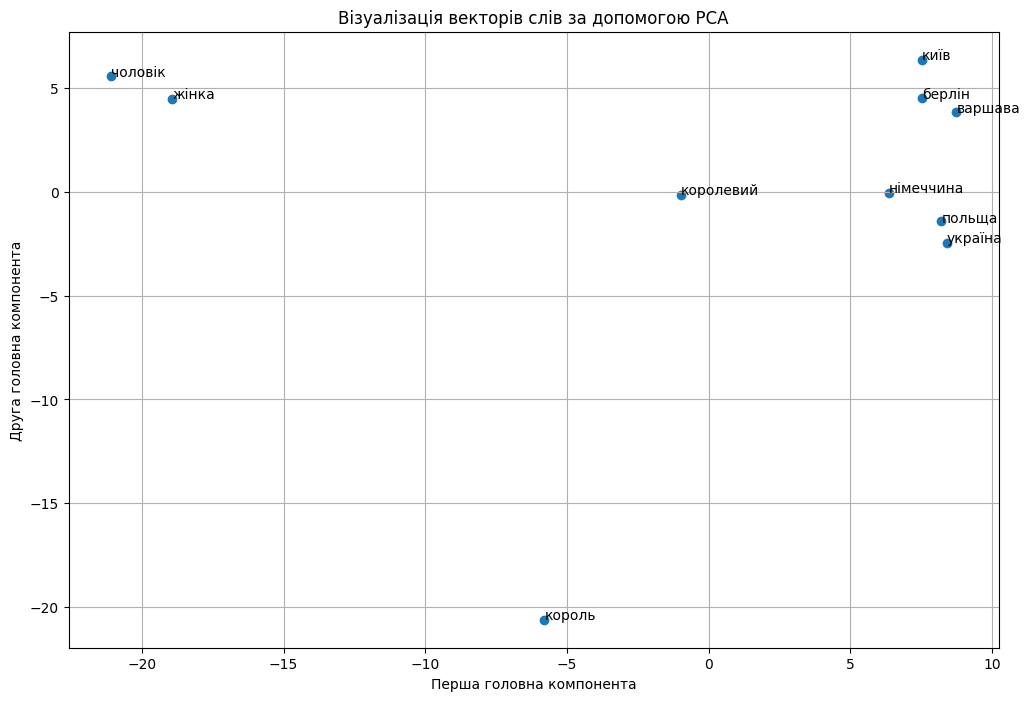

In [25]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np # Переконаємось, що numpy імпортовано

# Перевіряємо, чи були завантажені модель та лематизатор
if 'model' in locals() and model is not None and 'morph' in locals() and morph is not None:

    # Функція для візуалізації векторів (ВИПРАВЛЕНА ВЕРСІЯ)
    def visualize(words, word_embeddings, analyzer):
        """
        Візуалізує вектори слів на 2D-площині за допомогою PCA.
        """
        # Обробляємо кожне слово, щоб привести його до леми в нижньому регістрі
        processed_words = [preprocess_word(w, analyzer) for w in words]

        # --- ВИПРАВЛЕННЯ ТУТ ---
        # Видалено помилкову позначку [cite] з цього рядка
        valid_words_processed = [w for w in processed_words if w in word_embeddings.key_to_index]

        if not valid_words_processed:
            print("Жодне зі слів для візуалізації не знайдено в моделі.")
            return

        # Створюємо масив векторів слів тільки для допустимих слів
        word_vectors = np.array([word_embeddings[w] for w in valid_words_processed])

        # Застосовуємо PCA для зменшення розмірності до 2
        pca = PCA(n_components=2)
        components = pca.fit_transform(word_vectors)

        plt.figure(figsize=(12, 8))
        # Будуємо точкову діаграму
        plt.scatter(components[:, 0], components[:, 1])

        # Додаємо підписи до точок
        for i, word in enumerate(valid_words_processed):
            plt.annotate(word, xy=(components[i, 0], components[i, 1]))

        plt.title("Візуалізація векторів слів за допомогою PCA")
        plt.xlabel("Перша головна компонента")
        plt.ylabel("Друга головна компонента")
        plt.grid(True)
        plt.show()

    # --- ЗАПУСК ВІЗУАЛІЗАЦІЇ ---

    # Список слів для візуалізації
    words_to_visualize = ["Україна", "Київ", "Польща", "Варшава", "Німеччина", "Берлін", "король", "жінка", "чоловік", "королева"]
    print("\n--- Візуалізація векторів ---")
    visualize(words_to_visualize, model, morph)

else:
    print("\nПомилка: не можу виконати візуалізацію, оскільки модель або лематизатор не були завантажені.")